以下のブログを読んで、「**arg」and/or 「***kwarg」を使ったコードを書け。
http://iatlex.com/python/arg_kwargs

## webサイトから指定した株価データを取得するプログラムコードを作成
### 参考文献
https://non-dimension.com/kabuka-scraping/

In [1]:
#webサイトから指定した株価データを取得するプログラムコードを作成

#アナコンダにないパッケージのインストール方法
# 1. anaconda powershell promptを立ち上げる（パソコンで検索かけるとすぐに出できます）
# 2. >> conda install パッケージ名　　のコマンドを入力して実行するとダウンロード可能
from bs4 import BeautifulSoup as bs 
import pandas as pd
from datetime import datetime
import requests
import numpy as np
import matplotlib.pyplot as plt



def get_stock_data(*year, **mycode_dic):
    
    #{0}にformat関数の第一引数が、{1}に第二引数が入る
    url = 'https://kabuoji3.com/stock/{1}/{0}/'
    
    #format関数の記載順はformat(*args, **kwags)であることに注意。つまりformat(**kwags, *args)ではだめ
    read_url = url.format(*year, **mycode_dic)
    #print(read_url)
    
    #web情報をとってくるときに必要な情報（ユーザーエージェント情報）を変数に格納
    #この情報は個人によって異なる。ユーザーエージェントおよび調べ方は下記url参照
    #https://non-dimension.com/solution-403forbidden/
    headers = {
        "User-Agent": "Chrome/80.0.3987.122"
    }
    
    #requestsモジュールのget関数で指定したurlのweb情報をとってくる。詳しい説明は下記url参照
    #https://techacademy.jp/magazine/19195
    #https://note.nkmk.me/python-requests-usage/
    html = requests.get(read_url, headers = headers)
    
    #beautifulsoupを使用してhtml情報を文字列としてsoup変数に格納。下記url参照
    #https://qiita.com/Chanmoro/items/db51658b073acddea4ac
    soup = bs(html.content, 'html.parser')
    
    #htmlファイル内でタグtrが使われている部分全てをとってきて、それぞれを配列に格納する
    tag_tr = soup.find_all('tr')
    
    #まずはheadの情報を配列として取得。tag_tr[0]にはhead名（日付、始値など）がタグth区切りで格納されている
    #h.textとすることでhtmlファイルのtext部分のみ取ってこれる
    head = [h.text for h in tag_tr[0].find_all('th')]
    #>>head = ["日付", "始値", "高値", "安値", "終値", "出来高", "終値調整"]
    
    #以下のコードは日足データを取得するプログラム
    data = []  #とってきた日足データを格納するlistを用意
    
    for i in range(1, len(tag_tr)):
        #日足データはtag_tr[1]~から入っているのでfor文で各日にちの日足データをとってくる
        #htmlファイルのテキスト部分のみ配列に格納したあと、data配列にとってきた配列を書き加える
        data.append([d.text for d in tag_tr[i].find_all('td')])
        #tdタグのテキスト部分に各日にちの日足データが入っているのでそこを抽出
    
    #dataframe化
    return pd.DataFrame(data, columns = head)



    


In [3]:
#list(年度)と辞書型情報（銘柄情報）の記載
year = [2015, 2016, 2017, 2018, 2019]
mycode_dic = {"KAO":4452, "KOSE":4922, "SHISEIDO":4911}

#dataframeの格納
stock_df = get_stock_data(year[4], mycode_dic["KAO"])
stock_df


,日付,始値,高値,安値,終値,出来高,終値調整
0,2019-01-04,7890,7941,7782,7913,1970000,7913
1,2019-01-07,8100,8178,7977,8000,1501700,8000
2,2019-01-08,8000,8025,7766,7766,1900200,7766
3,2019-01-09,7891,7898,7787,7798,1634200,7798
4,2019-01-10,7600,7657,7365,7373,2425000,7373
...,...,...,...,...,...,...,...
236,2019-12-24,9085,9147,9073,9145,588000,9145
237,2019-12-25,9099,9157,9091,9112,438600,9112
238,2019-12-26,9121,9148,9114,9148,506700,9148
239,2019-12-27,9150,9172,9061,9080,622400,9080


In [5]:
#dataframeのカラム名変更（英語のほうが融通が利くため）
new_head = ['date', 'open', 'high', 'low', 'close', 'volume','close_ad'] 
stock_df.columns = new_head

#型の変更、まずは'date'列をdatetime型に
stock_df['date'] = pd.to_datetime(stock_df['date'])


In [6]:
#date列の型が変更されているか確認
stock_df.dtypes

date        datetime64[ns]
open                object
high                object
low                 object
close               object
volume              object
close_ad            object
dtype: object

In [7]:
#型の変更、他の列の型をobjectから次はfloat型に変更
for num in range(1, 7):
    stock_df.iloc[:,num] = stock_df.iloc[:,num].astype(float)
stock_df.dtypes

date        datetime64[ns]
open               float64
high               float64
low                float64
close              float64
volume             float64
close_ad           float64
dtype: object

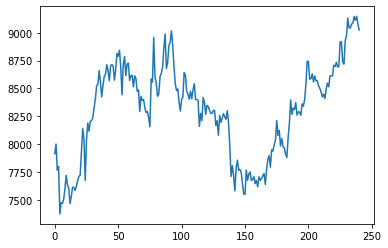

In [8]:
#簡単なグラフの描写
stock_df['close'].plot()
plt.show()

In [9]:
#list(年度)と辞書型情報（銘柄情報）の記載
year = [2015, 2016, 2017, 2018, 2019]
mycode_dic = {"recruit":6098, "KOSE":4922, "SHISEIDO":4911}

#dataframeの格納
stock_df = get_stock_data(year[4], mycode_dic["recruit"])
stock_df

,日付,始値,高値,安値,終値,出来高,終値調整
0,2019-01-04,2572.5,2599,2547,2581,5768000,2581
1,2019-01-07,2679.5,2737,2670.5,2723,4627200,2723
2,2019-01-08,2773,2782.5,2711.5,2744,4205300,2744
3,2019-01-09,2812,2907,2806,2886,5452000,2886
4,2019-01-10,2880.5,2898.5,2864.5,2880.5,4210100,2880.5
...,...,...,...,...,...,...,...
236,2019-12-24,4100,4145,4099,4134,1915700,4134
237,2019-12-25,4150,4157,4118,4127,1469700,4127
238,2019-12-26,4127,4162,4125,4143,1655000,4143
239,2019-12-27,4151,4175,4143,4144,1642700,4144


In [10]:
#dataframeのカラム名変更（英語のほうが融通が利くため）
new_head = ['date', 'open', 'high', 'low', 'close', 'volume','close_ad'] 
stock_df.columns = new_head

#型の変更、まずは'date'列をdatetime型に
stock_df['date'] = pd.to_datetime(stock_df['date'])

In [11]:
#date列の型が変更されているか確認
stock_df.dtypes

date        datetime64[ns]
open                object
high                object
low                 object
close               object
volume              object
close_ad            object
dtype: object

In [12]:
#型の変更、他の列の型をobjectから次はfloat型に変更
for num in range(1, 7):
    stock_df.iloc[:,num] = stock_df.iloc[:,num].astype(float)
stock_df.dtypes

date        datetime64[ns]
open               float64
high               float64
low                float64
close              float64
volume             float64
close_ad           float64
dtype: object

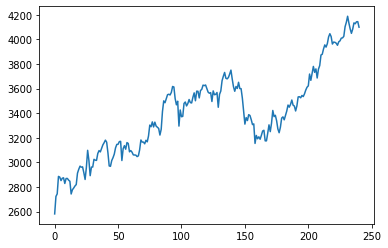

In [13]:
#簡単なグラフの描写
stock_df['close'].plot()
plt.show()